In [133]:
import pandas as pd

In [134]:
estados = pd.read_csv('data/DESM1/estados_brasileiros.csv', sep=';', index_col=0)
estados.head()

,estado,sigla_estado,pais
id_estado,,,
1,Acre,ac,Brasil
2,Alagoas,al,Brasil
3,Amapá,ap,Brasil
4,Amazonas,am,Brasil
5,Bahia,ba,Brasil


In [135]:
clientes = pd.read_excel('data/DESM1/dados_clientes.xlsx')
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [136]:
idades = pd.read_csv('data/DESM1/idade_clientes.csv', sep=';')
idades.head()

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44


#Preparando

In [137]:
null_estados = estados.isnull()
estados[null_estados.any(axis=1)]

,estado,sigla_estado,pais
id_estado,,,
18,Piauí,pi,NaN
24,Santa Catarina,sc,NaN


In [138]:
#estados.loc[estados['pais'].isnull(), 'pais'] = 'Brasil'
# estados = estados.fillna(value='Brazil')

estados.dropna(subset=['pais'], inplace=True)

estados[null_estados.any(axis=1)]


/tmp/ipykernel_10359/1613897693.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,estado,sigla_estado,pais
id_estado,,,


In [139]:
null_clientes = clientes.isnull()
clientes[null_clientes.any(axis=1)]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


In [140]:
# clientes.peso.fillna(round(clientes.peso.mean(),2), inplace=True) #- Substituir valores do peso nulos com a media
clientes.dropna(subset=['peso'], inplace=True)
clientes[null_clientes.any(axis=1)]

/tmp/ipykernel_10359/1144129017.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,id_cliente,peso,colesterol,genero,id_estado


In [141]:
null_idades = idades.isnull()
idades[null_idades.any(axis=1)]

,id_cliente,idade


In [142]:
idades.mean()

id_cliente    274.00000
idade          42.79159
dtype: float64

In [143]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,542.000000,542.000000,542.000000,542.000000
mean,275.190037,143.440959,170.280443,13.800738
std,158.194932,30.836868,39.185218,7.604659
min,1.000000,95.000000,102.000000,1.000000
25%,138.250000,116.000000,136.000000,7.000000
50%,276.500000,140.000000,169.000000,13.000000
75%,411.750000,171.000000,207.750000,20.000000
max,547.000000,203.000000,235.000000,27.000000


In [144]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

array([[<Axes: title={'center': 'idade'}>]], dtype=object)

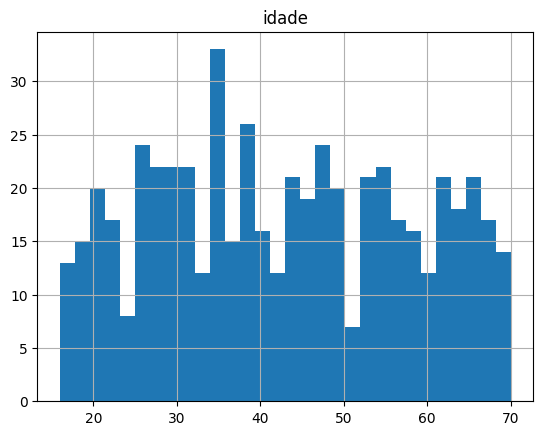

In [145]:
idades.hist(column = 'idade', bins=30 )

In [146]:
LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero']) 
clientes

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1
...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1
543,544,129.0,157,Masculino,1,1
544,545,107.0,115,Masculino,6,1
545,546,117.0,147,Masculino,20,1


In [147]:
clientes_estado = pd.merge(clientes, estados, how='inner', on='id_estado')
clientes_estado.sort_values("id_cliente")


,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil
...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rôndonia,ro,Brasil
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [148]:
base_completa = pd.merge(clientes_estado, idades, how='inner', on='id_cliente')
base_completa.sort_values("id_cliente")

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
83,6,198.0,227,Masculino,8,1,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,1,Rôndonia,ro,Brasil,20
430,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
155,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
372,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [149]:
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,54,149.0,183,Masculino,23,1,Roraima,rr,Brasil,48
2,61,113.0,129,Feminino,23,0,Roraima,rr,Brasil,70
3,154,134.0,162,Feminino,23,0,Roraima,rr,Brasil,26
4,164,133.0,155,Feminino,23,0,Roraima,rr,Brasil,51
...,...,...,...,...,...,...,...,...,...,...
493,456,134.0,168,Masculino,12,1,Mato Grosso do Sul,ms,Brasil,29
494,464,144.0,171,Feminino,12,0,Mato Grosso do Sul,ms,Brasil,32
495,492,142.0,172,Masculino,12,1,Mato Grosso do Sul,ms,Brasil,64
496,493,153.0,192,Masculino,12,1,Mato Grosso do Sul,ms,Brasil,70


array([[<Axes: title={'center': 'idade'}>]], dtype=object)

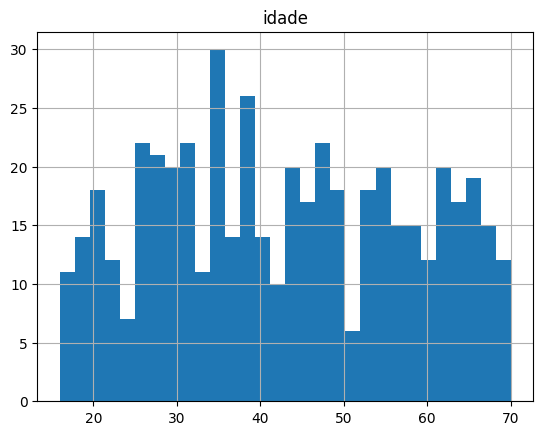

In [150]:
base_completa.hist('idade', bins=30)

In [151]:
base_completa.rename(columns={'id_cliente': 'cod_cliente', 'genero_number' : 'cod_genero'}, inplace=True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,54,149.0,183,Masculino,23,1,Roraima,rr,Brasil,48
2,61,113.0,129,Feminino,23,0,Roraima,rr,Brasil,70
3,154,134.0,162,Feminino,23,0,Roraima,rr,Brasil,26
4,164,133.0,155,Feminino,23,0,Roraima,rr,Brasil,51
...,...,...,...,...,...,...,...,...,...,...
493,456,134.0,168,Masculino,12,1,Mato Grosso do Sul,ms,Brasil,29
494,464,144.0,171,Feminino,12,0,Mato Grosso do Sul,ms,Brasil,32
495,492,142.0,172,Masculino,12,1,Mato Grosso do Sul,ms,Brasil,64
496,493,153.0,192,Masculino,12,1,Mato Grosso do Sul,ms,Brasil,70


In [152]:
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [153]:
base_completa = base_completa[['cod_cliente', 'cod_genero', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais'  ]].reset_index(drop=True)
base_completa

,cod_cliente,cod_genero,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,54,1,Masculino,48,149.0,183,23,Roraima,RR,Brasil
2,61,0,Feminino,70,113.0,129,23,Roraima,RR,Brasil
3,154,0,Feminino,26,134.0,162,23,Roraima,RR,Brasil
4,164,0,Feminino,51,133.0,155,23,Roraima,RR,Brasil
...,...,...,...,...,...,...,...,...,...,...
493,456,1,Masculino,29,134.0,168,12,Mato Grosso do Sul,MS,Brasil
494,464,0,Feminino,32,144.0,171,12,Mato Grosso do Sul,MS,Brasil
495,492,1,Masculino,64,142.0,172,12,Mato Grosso do Sul,MS,Brasil
496,493,1,Masculino,70,153.0,192,12,Mato Grosso do Sul,MS,Brasil


#Aplicando Elbow Method

In [154]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [158]:
#Elbow Method in K-means Clustering

def calcular_wcss(dados):
  wcss = []
  for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, n_init='auto')
    kmeans.fit(X=dados)
    wcss.append(kmeans.inertia_)
  return wcss

In [159]:
dados_calc = base_completa[['peso', 'colesterol']]
dados_calc.head()

,peso,colesterol
0,102.0,111
1,149.0,183
2,113.0,129
3,134.0,162
4,133.0,155


In [160]:
wcss_clientes = calcular_wcss(dados_calc)

In [161]:
# visualizando dados
for i in range(len(wcss_clientes)):
  print(f"for cluster {i}, value of {wcss_clientes[i]}")

for cluster 0, value of 1248240.668674699
for cluster 1, value of 298948.2448183639
for cluster 2, value of 127855.87745425905
for cluster 3, value of 74792.59232437
for cluster 4, value of 49074.34708289366
for cluster 5, value of 34073.67229258765
for cluster 6, value of 25196.643265709747
for cluster 7, value of 20441.831678154194
for cluster 8, value of 16049.967277528322
for cluster 9, value of 13488.336324172353


# Visualizando Grafico

In [162]:
import plotly.express as px 
import plotly.offline as py
import plotly.graph_objects as go # concatenização de graficos

In [163]:
grafico_wcss = px.line( x= range(10),
                       y=wcss_clientes
                       )
grafico_wcss.show()

In [164]:
fig = go.Figure(grafico_wcss)
fig.update_layout(title='Calculando o WCSS',
                  xaxis_title= 'Numero de clusters',
                  yaxis_title= 'Valor do Wcss',
                  template = 'ggplot2')

fig.show()

In [165]:
kmeans_clientes = KMeans(n_clusters=3, random_state=1)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_calc)
base_completa

/home/wedivv/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,cod_cliente,cod_genero,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,0
1,54,1,Masculino,48,149.0,183,23,Roraima,RR,Brasil,1
2,61,0,Feminino,70,113.0,129,23,Roraima,RR,Brasil,0
3,154,0,Feminino,26,134.0,162,23,Roraima,RR,Brasil,1
4,164,0,Feminino,51,133.0,155,23,Roraima,RR,Brasil,1
...,...,...,...,...,...,...,...,...,...,...,...
493,456,1,Masculino,29,134.0,168,12,Mato Grosso do Sul,MS,Brasil,1
494,464,0,Feminino,32,144.0,171,12,Mato Grosso do Sul,MS,Brasil,1
495,492,1,Masculino,64,142.0,172,12,Mato Grosso do Sul,MS,Brasil,1
496,493,1,Masculino,70,153.0,192,12,Mato Grosso do Sul,MS,Brasil,1


In [166]:
centroides_cluster = kmeans_clientes.cluster_centers_
centroides_cluster

array([[110.42857143, 125.91428571],
       [141.97575758, 173.16363636],
       [182.25316456, 217.0443038 ]])

In [167]:
grafico_centroide = px.scatter(x = base_completa['peso'],
                                y = base_completa['colesterol'],
                                color= base_completa['cluster'])
grafico_centroide.add_scatter(x=centroides_cluster[:,0], y=centroides_cluster[:,1], mode="markers",
                marker=dict(size=7, color="LightSeaGreen"))

In [168]:
def plotar_grafico(X, Y, cluster_labels, xlabel, ylabel):
    grafico = px.scatter(x=X, y=Y, color=cluster_labels)

    grafico.add_scatter(x=centroides_cluster[:,0], y=centroides_cluster[:,1], mode="markers",
                marker=dict(size=17, color="LightSeaGreen"))

    fig = go.Figure(grafico)
    fig.update_layout(title='Análise de Clusters',
                    xaxis_title=xlabel,
                    yaxis_title=ylabel)
    fig.show()


# Segmentando

In [169]:
x = 'peso'
y = 'colesterol'
cluster_labels = base_completa['cluster']

plotar_grafico(base_completa[x], base_completa[y], cluster_labels, x, y)


In [170]:
cluster_clientes = base_completa

In [171]:
cluster_clientes.loc[cluster_clientes['cluster'] == 0, 'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['cluster'] == 1, 'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster'] == 2, 'nome_cluster'] = 'Risco Moderado'

In [172]:
cluster_clientes

,cod_cliente,cod_genero,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,0,Baixo Risco
1,54,1,Masculino,48,149.0,183,23,Roraima,RR,Brasil,1,Alto Risco
2,61,0,Feminino,70,113.0,129,23,Roraima,RR,Brasil,0,Baixo Risco
3,154,0,Feminino,26,134.0,162,23,Roraima,RR,Brasil,1,Alto Risco
4,164,0,Feminino,51,133.0,155,23,Roraima,RR,Brasil,1,Alto Risco
...,...,...,...,...,...,...,...,...,...,...,...,...
493,456,1,Masculino,29,134.0,168,12,Mato Grosso do Sul,MS,Brasil,1,Alto Risco
494,464,0,Feminino,32,144.0,171,12,Mato Grosso do Sul,MS,Brasil,1,Alto Risco
495,492,1,Masculino,64,142.0,172,12,Mato Grosso do Sul,MS,Brasil,1,Alto Risco
496,493,1,Masculino,70,153.0,192,12,Mato Grosso do Sul,MS,Brasil,1,Alto Risco


In [173]:
cluster_clientes.groupby("nome_cluster")["idade"].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,165.0,42.151515,15.043679,16.0,29.0,42.0,54.0,70.0
Baixo Risco,175.0,43.331429,15.054456,17.0,31.0,42.0,57.0,70.0
Risco Moderado,158.0,43.126582,15.172358,16.0,32.0,43.0,56.0,69.0


In [174]:
cluster_clientes.groupby("nome_cluster")["estado"].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,165,25,Mato Grosso do Sul,12
Baixo Risco,175,25,Amazonas,13
Risco Moderado,158,25,Pará,10


In [175]:
cluster_clientes.groupby("nome_cluster")["colesterol"].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,165.0,173.163636,13.633393,150.0,162.0,172.0,185.0,198.0
Baixo Risco,175.0,125.914286,13.973644,102.0,113.5,127.0,138.0,151.0
Risco Moderado,158.0,217.044304,9.629007,196.0,211.0,219.0,224.0,235.0


In [176]:
cluster_clientes.groupby("nome_cluster")["peso"].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,165.0,141.975758,10.347588,124.0,133.0,142.0,151.00,159.0
Baixo Risco,175.0,110.428571,8.170193,95.0,103.5,111.0,117.00,126.0
Risco Moderado,158.0,182.253165,11.189700,158.0,173.0,182.0,190.75,203.0


In [177]:
# definindo
alto_risco = cluster_clientes[cluster_clientes["nome_cluster"] == "Alto Risco"]
moderado_alto = cluster_clientes[(cluster_clientes["nome_cluster"] == "Risco Moderado") | (cluster_clientes["nome_cluster"] == "Alto Risco")]
moderado_baixo = cluster_clientes[(cluster_clientes["nome_cluster"] == "Risco Moderado") | (cluster_clientes["nome_cluster"] == "Baixo Risco")]
baixo_risco = cluster_clientes[cluster_clientes["nome_cluster"] == "Baixo Risco"]


# 9 Qual o valor do centroide para o grupo de baixo risco?

In [178]:
# O mesmo é verificavel no grafico.
centroid_baixo_risco = baixo_risco[["peso", "colesterol"]].mean()

print("Centroide para o grupo de baixo risco:")
print(centroid_baixo_risco)

Centroide para o grupo de baixo risco:
peso          110.428571
colesterol    125.914286
dtype: float64


# 10 Qual a média de idades para o cluster de risco moderado alto?

In [179]:
moderado_alto["idade"].describe()
# 42.35 anos
# 43.05
# 42.62

count    323.000000
mean      42.628483
std       15.091174
min       16.000000
25%       30.000000
50%       42.000000
75%       55.000000
max       70.000000
Name: idade, dtype: float64

# 11 Qual o valor mínimo do colesterol coletado para o grupo de baixo risco?

In [ ]:
baixo_risco["colesterol"].describe()
# 102.0

count    175.000000
mean     125.914286
std       13.973644
min      102.000000
25%      113.500000
50%      127.000000
75%      138.000000
max      151.000000
Name: colesterol, dtype: float64

# 12 Qual é o desvio padrão do peso presente no cluster de alto risco?

In [ ]:
# calcular o desvio padrão do peso
alto_risco["peso"].std()

10.347588098347714

# 13 Qual o estado com maior número de pessoas que estão no grupo de risco Moderado baixo?

In [ ]:
moderado_baixo.groupby('estado').size().sort_values()


estado
Acre                    7
São Paulo               7
Espírito Santo          9
Mato Grosso do Sul      9
Pernambuco             10
Paraíba                10
Roraima                11
Bahia                  11
Sergipe                12
Tocantins              12
Goiás                  12
Paraná                 13
Rio Grande do Sul      13
Rôndonia               13
Mato Grosso            14
Pará                   15
Ceará                  16
Amapá                  16
Alagoas                16
Minas Gerais           16
Rio de Janeiro         17
Maranhão               17
Distrito Federal       18
Rio Grande do Norte    18
Amazonas               21
dtype: int64

# 14 Qual a média dos pesos para o grupo de alto risco ?

In [ ]:
# calcular a média dos pesos
media_pesos = alto_risco["peso"].mean()

print(media_pesos)

141.97575757575757


# 15 - VERIFICANDO alternativas

###  desvio padrão para colesterol para o grupo de risco moderado alto para o gênero feminino.

In [ ]:
moderado_alto_feminino = moderado_alto[moderado_alto["cod_genero"] == 0]

# calcular a descrição estatística do peso
moderado_alto_feminino["colesterol"].describe()


count    164.000000
mean     191.981707
std       25.215506
min      150.000000
25%      169.000000
50%      191.500000
75%      218.000000
max      235.000000
Name: colesterol, dtype: float64

### media de colesterol generos

In [ ]:
baixo_risco.groupby("genero")["colesterol"].describe()

,count,mean,std,min,25%,50%,75%,max
genero,,,,,,,,
Feminino,76.0,127.671053,13.209480,102.0,119.5,129.0,137.25,150.0
Masculino,99.0,124.565657,14.454123,102.0,111.0,122.0,139.00,151.0
